# Import Libraries and Data

In [1]:
#import libraries for handling data
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

#for feature engineering (normalizing continuous variables)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
# make prettier plots
%config InlineBackend.figure_format = 'svg' 

# EDA on Raw Data

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

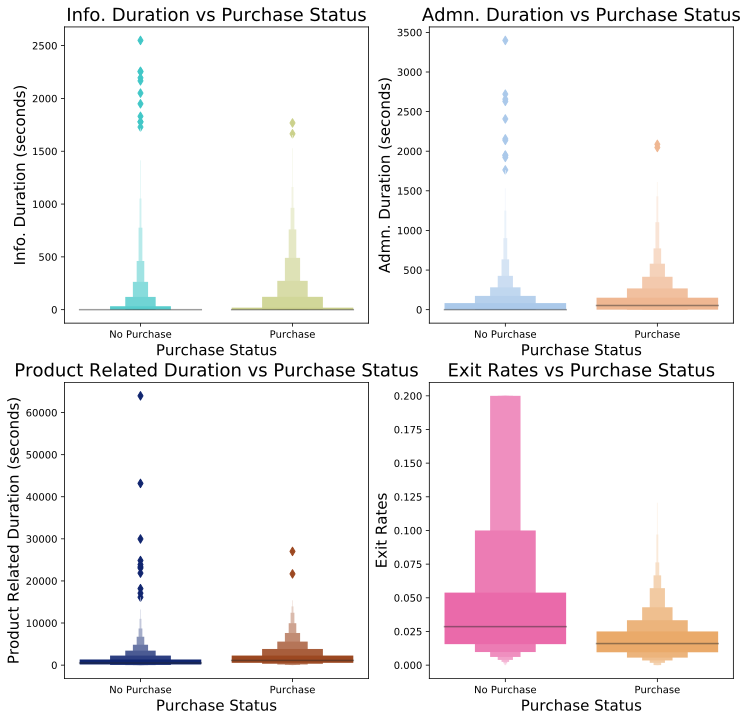

In [3]:
# product related duration vs purchase

plt.rcParams['figure.figsize'] = (12, 12)

plt.subplot(2, 2, 1)
sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'rainbow')
plt.title('Info. Duration vs Purchase Status', fontsize = 18)
plt.xlabel('Purchase Status', fontsize = 15)
plt.xticks(np.arange(2), ('No Purchase', 'Purchase'))
plt.ylabel('Info. Duration (seconds)', fontsize = 15)

# product related duration vs purchase

plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. Duration vs Purchase Status', fontsize = 18)
plt.xlabel('Purchase Status', fontsize = 15)
plt.xticks(np.arange(2), ('No Purchase', 'Purchase'))
plt.ylabel('Admn. Duration (seconds)', fontsize = 15)

# product related duration vs purchase

plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related Duration vs Purchase Status', fontsize = 18)
plt.xlabel('Purchase Status', fontsize = 15)
plt.xticks(np.arange(2), ('No Purchase', 'Purchase'))
plt.ylabel('Product Related Duration (seconds)', fontsize = 15)

# exit rate vs purchase

plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('Exit Rates vs Purchase Status', fontsize = 18)
plt.xlabel('Purchase Status', fontsize = 15)
plt.xticks(np.arange(2), ('No Purchase', 'Purchase'))
plt.ylabel('Exit Rates', fontsize = 15)


plt.show()

,Informational,Administrative,ProductRelated
count,12330.000000,12330.000000,12330.000000
mean,0.503569,2.315166,31.731468
std,1.270156,3.321784,44.475503
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000
50%,0.000000,1.000000,18.000000
75%,0.000000,4.000000,38.000000
max,24.000000,27.000000,705.000000


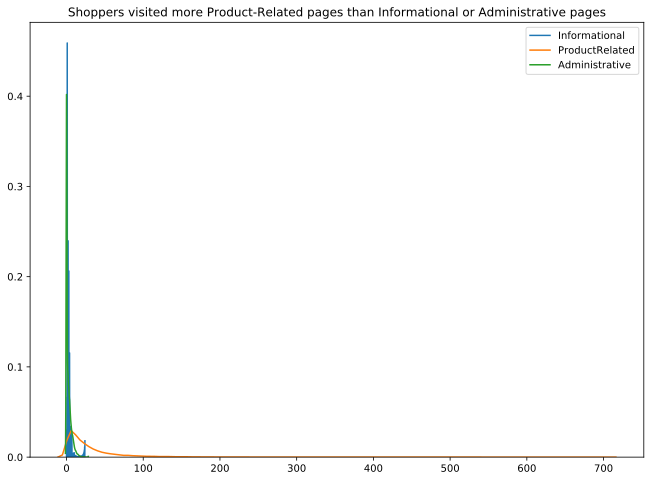

In [4]:
#Shoppers visited more Product-Related pages than Informational or Administrative pages
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
plt.title("Shoppers visited more Product-Related pages than Informational or Administrative pages", y = 1.0, fontsize=12)
sns.kdeplot(df['Informational'])
sns.kdeplot(df['ProductRelated'])
sns.kdeplot(df['Administrative']);
df.filter(items=['Informational','Administrative','ProductRelated']).describe()

,Informational_Duration,Administrative_Duration,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000
mean,34.472398,80.818611,1194.746220
std,140.749294,176.779107,1913.669288
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500
50%,0.000000,7.500000,598.936905
75%,0.000000,93.256250,1464.157213
max,2549.375000,3398.750000,63973.522230


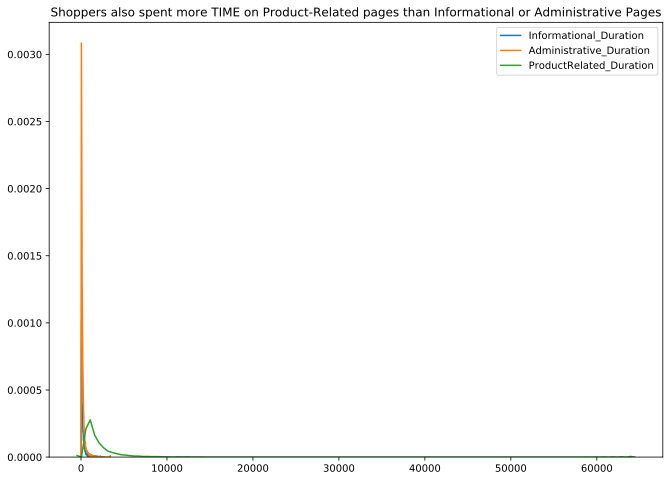

In [5]:
#Shoppers also spent more TIME on Product-Related pages than Informational or Administrative Pages 
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
plt.title("Shoppers also spent more TIME on Product-Related pages than Informational or Administrative Pages", y = 1.0, fontsize=12)
sns.kdeplot(df['Informational_Duration'])
sns.kdeplot(df['Administrative_Duration'])
sns.kdeplot(df['ProductRelated_Duration']);
df.filter(items=['Informational_Duration','Administrative_Duration','ProductRelated_Duration']).describe()

**My continous variables are not very Gaussian**

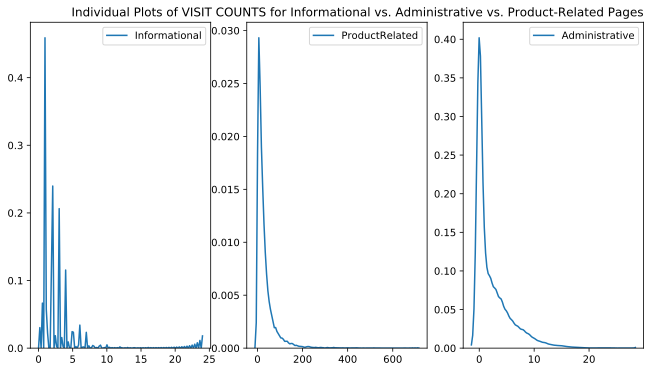

In [6]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(11,6))
plt.title("Individual Plots of VISIT COUNTS for Informational vs. Administrative vs. Product-Related Pages", y = 1.0, fontsize=12,loc='right')
sns.kdeplot(df['Informational'], ax=ax1)
sns.kdeplot(df['ProductRelated'], ax = ax2)
sns.kdeplot(df['Administrative'], ax=ax3);

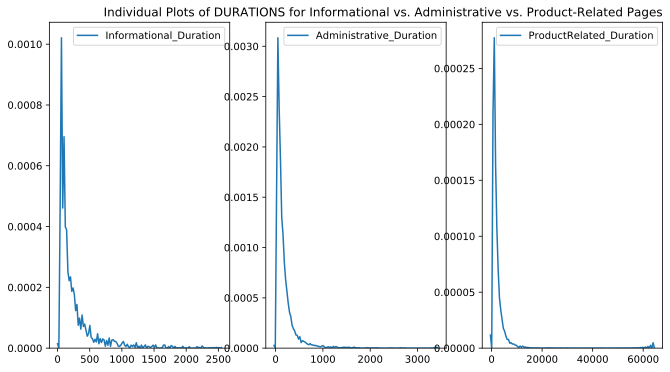

In [7]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(11,6))
plt.title("Individual Plots of DURATIONS for Informational vs. Administrative vs. Product-Related Pages", y = 1.0, fontsize=12,loc='right')
sns.kdeplot(df['Informational_Duration'],   ax=ax1)
sns.kdeplot(df['Administrative_Duration'],   ax=ax2)
sns.kdeplot(df['ProductRelated_Duration'],   ax=ax3);

,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000
mean,0.022191,0.043073,5.889258
std,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000
25%,0.000000,0.014286,0.000000
50%,0.003112,0.025156,0.000000
75%,0.016813,0.050000,0.000000
max,0.200000,0.200000,361.763742


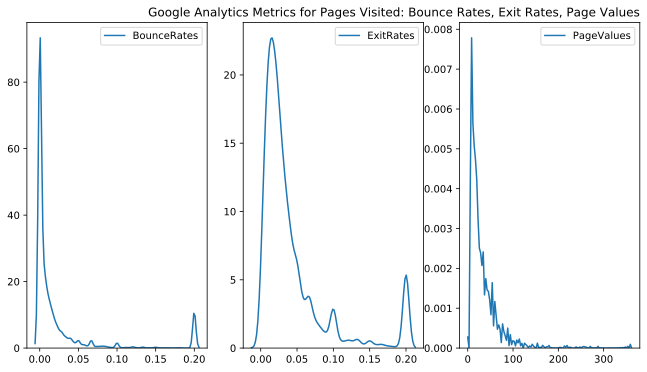

In [8]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols=3, figsize=(11,6))
plt.title("Google Analytics Metrics for Pages Visited: Bounce Rates, Exit Rates, Page Values", y = 1.0, fontsize=12,loc='right')
sns.kdeplot(df['BounceRates'],   ax=ax1)
sns.kdeplot(df['ExitRates'],   ax=ax2)
sns.kdeplot(df['PageValues'],   ax=ax3);
df.filter(items=['BounceRates','ExitRates','PageValues']).describe()

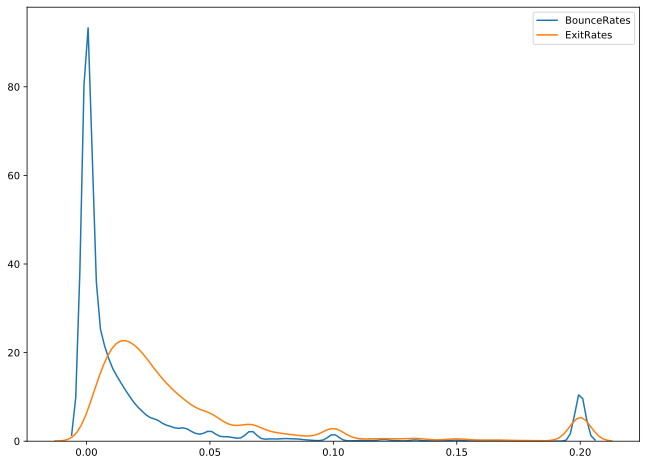

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.kdeplot(df['BounceRates'])
sns.kdeplot(df['ExitRates']);

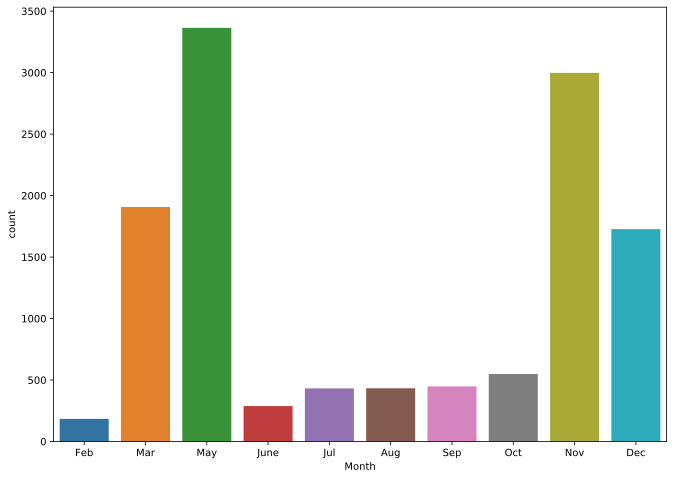

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Month', data=df, order=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

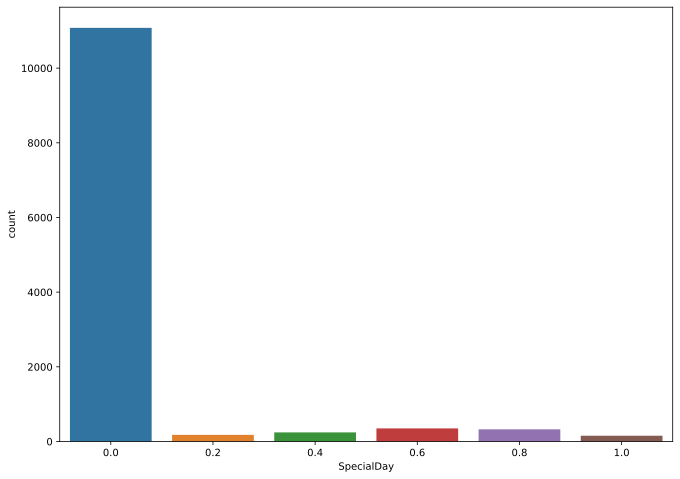

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(df['SpecialDay']);

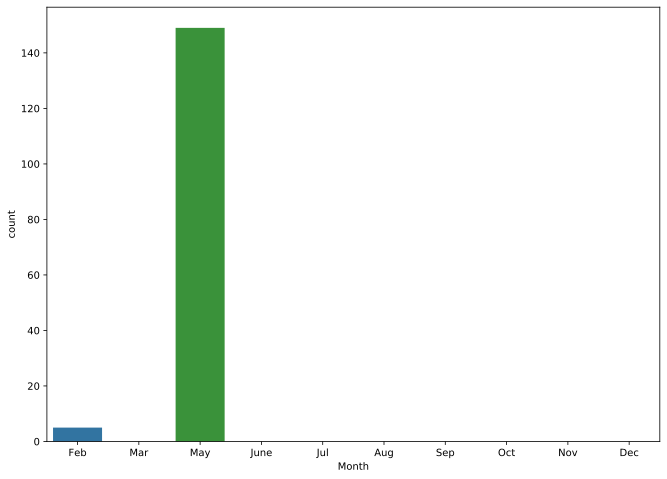

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Month', data=df[df.SpecialDay==True], order=['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

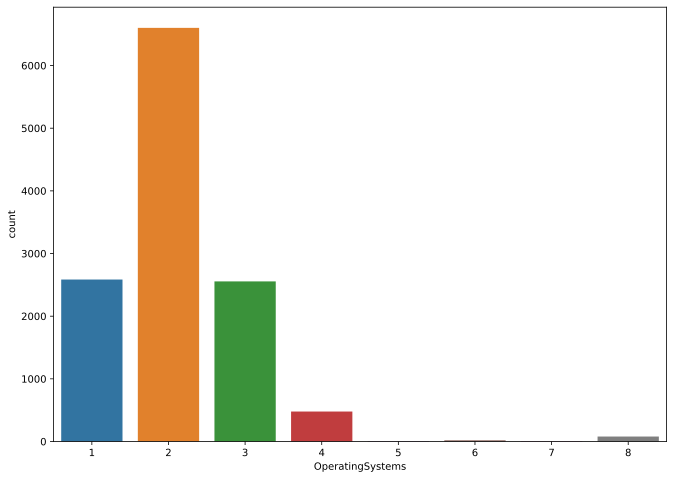

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='OperatingSystems', data=df);

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

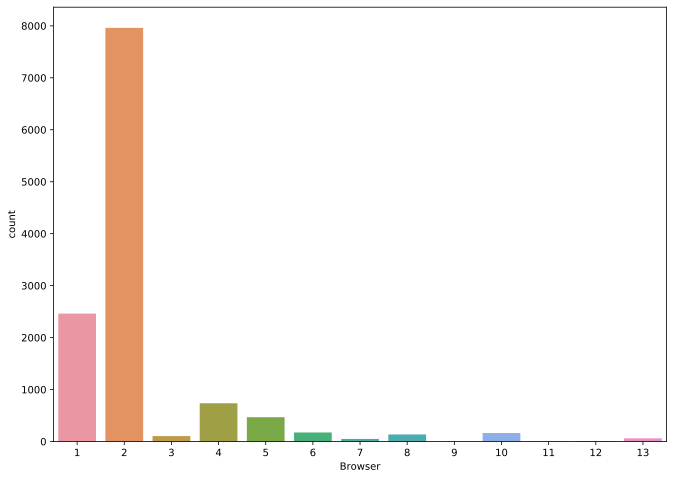

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Browser', data=df); 
df['Browser'].value_counts()

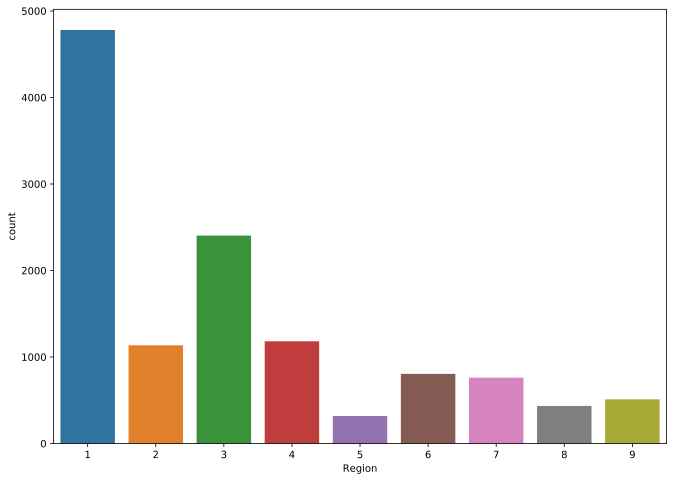

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Region', data=df); 

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

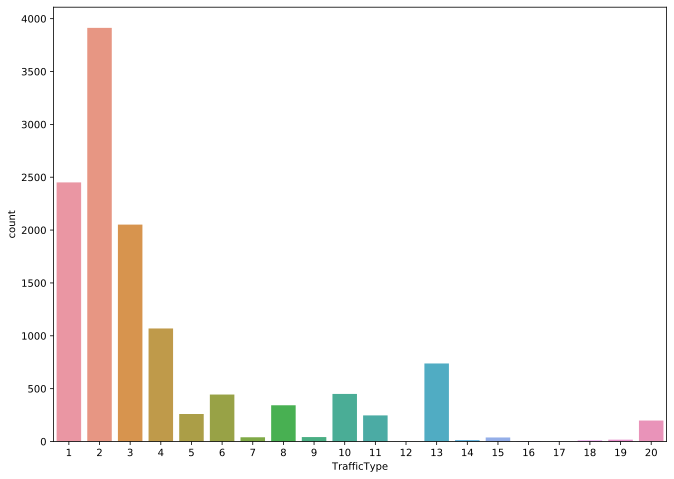

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='TrafficType', data=df); 
df['TrafficType'].value_counts()

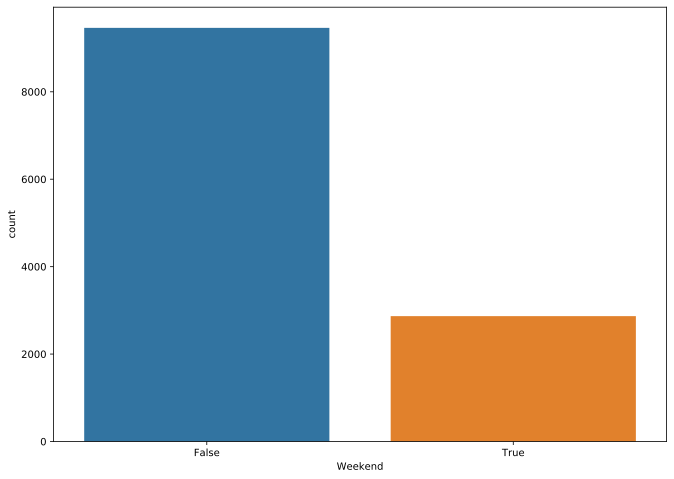

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='Weekend', data=df); 

# Feature Transformations

In [18]:
shopping_intent_df = pd.read_pickle('shopping_intent_df')
shopping_intent_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,0.036496,0.020032,0.000081,0.059854,0.001054,0.003082,0.000243,0.000811,0.001379,0.016058
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,0.187529,0.140117,0.009006,0.237226,0.032455,0.055432,0.015597,0.028468,0.037107,0.125705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#train-test split 
X_train, X_test, y_train, y_test = train_test_split(shopping_intent_df.drop('Purchase', axis=1), shopping_intent_df['Purchase'], test_size=0.2, random_state=41)

#pickle for future use
# X_train_pickle = X_train.to_pickle('X_train')
# X_test_pickle = X_test.to_pickle('X_test')
# y_train_pickle = y_train.to_pickle('y_train')
# y_test_pickle = y_test.to_pickle('y_test')

In [21]:
#test StandardScaler
stdscaler = StandardScaler().fit(X_train)
X_train_stdscaled = stdscaler.transform(X_train.values)
X_train_stdscaled = pd.DataFrame(X_train_stdscaled, columns = ['Administrative',  'Administrative_Duration',
 'Informational',  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',  
 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
 'VisitorType_New_Visitor',  'VisitorType_Returning_Visitor', 'OperatingSystem_1', 'OperatingSystem_2',
 'OperatingSystem_3', 'OperatingSystem_4', 'OperatingSystem_6', 'OperatingSystem_7', 'OperatingSystem_8',
 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10',
 'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 
 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
 'TrafficType_15', 'TrafficType_16', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20'])
X_train_stdscaled.describe() 


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20
count,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,...,9.864000e+03,9.864000e+03,9864.0,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03
mean,-4.646189e-17,-5.762715e-18,-7.203394e-19,-2.377120e-17,-2.809323e-17,-4.105934e-17,2.737290e-17,-6.050851e-17,6.338986e-17,6.591105e-17,...,-3.925849e-17,5.042375e-18,0.0,1.440679e-18,-2.521188e-18,-9.004242e-18,-2.881357e-18,-1.440679e-18,9.724581e-18,-6.771190e-17
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,0.0,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-6.940602e-01,-4.569312e-01,-3.953892e-01,-2.464670e-01,-7.135067e-01,-6.146371e-01,-4.554863e-01,-8.873664e-01,-3.154331e-01,-3.046125e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
25%,-6.940602e-01,-4.569312e-01,-3.953892e-01,-2.464670e-01,-5.562408e-01,-5.176409e-01,-4.554863e-01,-5.914951e-01,-3.154331e-01,-3.046125e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
50%,-3.954121e-01,-4.171592e-01,-3.953892e-01,-2.464670e-01,-3.091087e-01,-3.056563e-01,-3.925544e-01,-3.671081e-01,-3.154331e-01,-3.046125e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
75%,5.005323e-01,6.870219e-02,-3.953892e-01,-2.464670e-01,1.402224e-01,1.406042e-01,-1.093606e-01,1.481833e-01,-3.154331e-01,-3.046125e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
max,7.369440e+00,1.854835e+01,1.831396e+01,1.791710e+01,1.512541e+01,3.215202e+01,3.698022e+00,3.254833e+00,1.863334e+01,4.828113e+00,...,5.094195e+00,7.135530e+00,0.0,3.968253e+00,3.509986e+01,1.780993e+01,7.022108e+01,3.309078e+01,2.562421e+01,7.914462e+00


In [22]:
X_train_logstdscaled = X_train_stdscaled.copy()
X_train_logstdscaled['Informational_Duration'] = np.log(X_train_stdscaled['Informational_Duration'])
X_train_logstdscaled['Administrative_Duration'] = np.log(X_train_stdscaled['Administrative_Duration'])
X_train_logstdscaled['ProductRelated_Duration'] = np.log(X_train_stdscaled['ProductRelated_Duration'])

/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
#test PowerTransformer(Yeo-Johnson)
YJscaler = PowerTransformer(method='yeo-johnson').fit(X_train)
X_train_YJscaled = YJscaler.transform(X_train.values)
X_train_YJscaled = pd.DataFrame(X_train_YJscaled, columns = ['Administrative',  'Administrative_Duration',
 'Informational',  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',  
 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
 'VisitorType_New_Visitor',  'VisitorType_Returning_Visitor', 'OperatingSystem_1', 'OperatingSystem_2',
 'OperatingSystem_3', 'OperatingSystem_4', 'OperatingSystem_6', 'OperatingSystem_7', 'OperatingSystem_8',
 'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10',
 'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 
 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
 'TrafficType_15', 'TrafficType_16', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20'])
X_train_YJscaled.describe() 


/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2863: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20
count,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,...,9.864000e+03,9.864000e+03,9864.0,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03
mean,-2.099789e-16,4.322036e-17,4.358053e-17,2.377120e-17,8.536021e-17,4.322036e-17,2.449154e-17,-1.383052e-16,1.080509e-17,-6.699156e-17,...,-3.925849e-17,-5.852757e-18,0.0,-5.114409e-17,-8.283903e-18,7.563563e-18,-2.881357e-18,-8.644072e-18,3.241527e-18,-4.718223e-17
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,0.0,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-9.894558e-01,-9.959631e-01,-5.220809e-01,-4.940581e-01,-2.524816e+00,-2.111019e+00,-7.971492e-01,-1.788221e+00,-5.304964e-01,-3.321224e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
25%,-9.894558e-01,-9.959631e-01,-5.220809e-01,-4.940581e-01,-7.310969e-01,-6.212933e-01,-7.971492e-01,-7.668316e-01,-5.304964e-01,-3.321224e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
50%,9.189569e-02,3.191079e-02,-5.220809e-01,-4.940581e-01,3.665156e-02,2.480341e-02,-4.768985e-01,-1.836632e-01,-5.304964e-01,-3.321224e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
75%,1.039173e+00,9.820919e-01,-5.220809e-01,-4.940581e-01,6.848201e-01,6.558818e-01,5.849832e-01,7.280588e-01,-5.304964e-01,-3.321224e-01,...,-1.963019e-01,-1.401438e-01,0.0,-2.520001e-01,-2.849014e-02,-5.614846e-02,-1.424074e-02,-3.021989e-02,-3.902560e-02,-1.263510e-01
max,1.961744e+00,1.989028e+00,1.998521e+00,2.080599e+00,3.388751e+00,5.342641e+00,2.211423e+00,1.986978e+00,1.988578e+00,3.020638e+00,...,5.094195e+00,7.135530e+00,0.0,3.968253e+00,3.509986e+01,1.780993e+01,7.022108e+01,3.309078e+01,2.562421e+01,7.914462e+00


/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


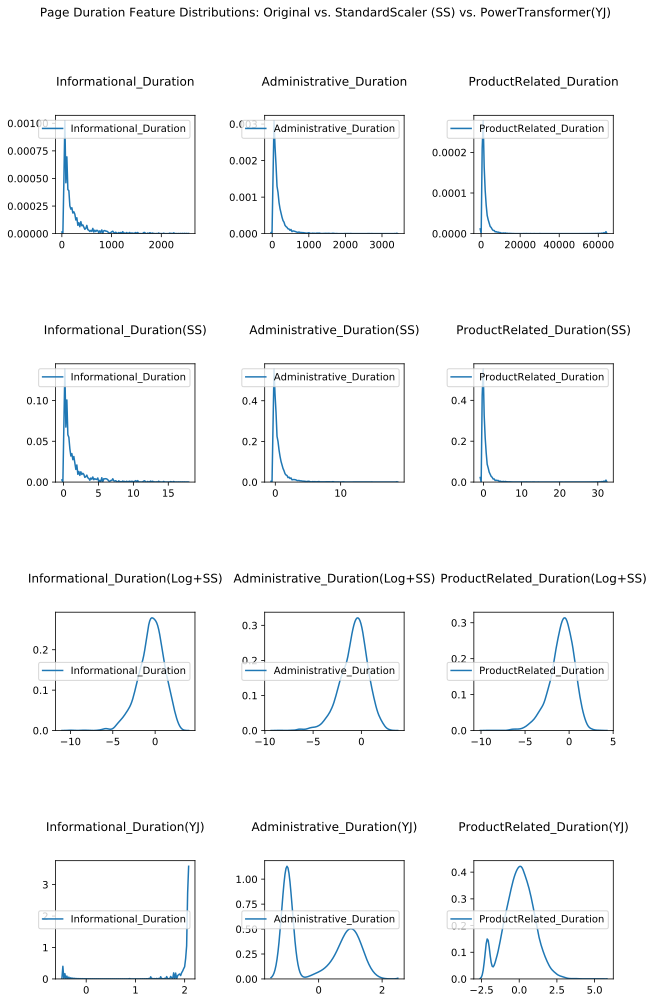

In [26]:
fig, ax = plt.subplots(figsize=(10,15),ncols=3,nrows=4)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.2

plt.suptitle("Page Duration Feature Distributions: Original vs. StandardScaler (SS) vs. PowerTransformer(YJ)", y = 1.0, fontsize=12)

#Original Dataset
ax[0][0].set_title("Informational_Duration",                    y = y_title_margin)
ax[0][1].set_title("Administrative_Duration",         y = y_title_margin)
ax[0][2].set_title("ProductRelated_Duration", y = y_title_margin)

sns.kdeplot(df['Informational_Duration'],   ax=ax[0][0])
sns.kdeplot(df['Administrative_Duration'],   ax=ax[0][1])
sns.kdeplot(df['ProductRelated_Duration'],  ax=ax[0][2])

#StandardScaler (SS) 
ax[1][0].set_title("Informational_Duration(SS)",                    y = y_title_margin)
ax[1][1].set_title("Administrative_Duration(SS)",         y = y_title_margin)
ax[1][2].set_title("ProductRelated_Duration(SS)", y = y_title_margin)

sns.kdeplot(X_train_stdscaled['Informational_Duration'],   ax=ax[1][0])
sns.kdeplot(X_train_stdscaled['Administrative_Duration'],   ax=ax[1][1])
sns.kdeplot(X_train_stdscaled['ProductRelated_Duration'],  ax=ax[1][2])

#LogTransformed + SS
ax[2][0].set_title("Informational_Duration(Log+SS)",                    y = y_title_margin)
ax[2][1].set_title("Administrative_Duration(Log+SS)",         y = y_title_margin)
ax[2][2].set_title("ProductRelated_Duration(Log+SS)", y = y_title_margin)

sns.kdeplot(X_train_logstdscaled['Informational_Duration'],   ax=ax[2][0])
sns.kdeplot(X_train_logstdscaled['Administrative_Duration'],   ax=ax[2][1])
sns.kdeplot(X_train_logstdscaled['ProductRelated_Duration'],  ax=ax[2][2])

#PowerTransformation (Yeo-Johnson) - BoxCox requires strictly POSITIVE data (this set contains zeroes)
ax[3][0].set_title("Informational_Duration(YJ)",                    y = y_title_margin)
ax[3][1].set_title("Administrative_Duration(YJ)",         y = y_title_margin)
ax[3][2].set_title("ProductRelated_Duration(YJ)", y = y_title_margin)

sns.kdeplot(X_train_YJscaled['Informational_Duration'],   ax=ax[3][0])
sns.kdeplot(X_train_YJscaled['Administrative_Duration'],   ax=ax[3][1])
sns.kdeplot(X_train_YJscaled['ProductRelated_Duration'],  ax=ax[3][2])



In [27]:
X_train_logstdscaled['Informational'] = np.log(X_train_stdscaled['Informational'])
X_train_logstdscaled['Administrative'] = np.log(X_train_stdscaled['Administrative'])
X_train_logstdscaled['ProductRelated'] = np.log(X_train_stdscaled['ProductRelated'])

/Users/kristentokunaga/anaconda3/envs/metis/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


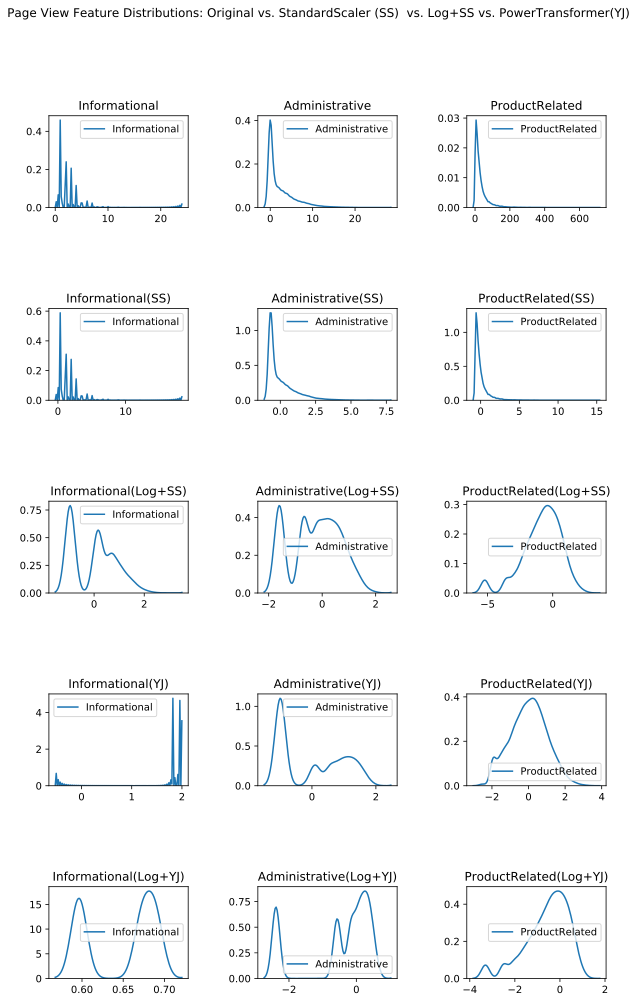

In [28]:
fig, ax = plt.subplots(figsize=(10,15),ncols=3,nrows=5)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.0

plt.suptitle("Page View Feature Distributions: Original vs. StandardScaler (SS)  vs. Log+SS vs. PowerTransformer(YJ)", y = 1.0, fontsize=12)

#Original Dataset
ax[0][0].set_title("Informational",                    y = y_title_margin)
ax[0][1].set_title("Administrative",         y = y_title_margin)
ax[0][2].set_title("ProductRelated", y = y_title_margin)

sns.kdeplot(df['Informational'],   ax=ax[0][0])
sns.kdeplot(df['Administrative'],   ax=ax[0][1])
sns.kdeplot(df['ProductRelated'],  ax=ax[0][2])

#StandardScaler (SS) 
ax[1][0].set_title("Informational(SS)",                    y = y_title_margin)
ax[1][1].set_title("Administrative(SS)",         y = y_title_margin)
ax[1][2].set_title("ProductRelated(SS)", y = y_title_margin)

sns.kdeplot(X_train_stdscaled['Informational'],   ax=ax[1][0])
sns.kdeplot(X_train_stdscaled['Administrative'],   ax=ax[1][1])
sns.kdeplot(X_train_stdscaled['ProductRelated'],  ax=ax[1][2])

#LogTransformed + SS
ax[2][0].set_title("Informational(Log+SS)",                    y = y_title_margin)
ax[2][1].set_title("Administrative(Log+SS)",         y = y_title_margin)
ax[2][2].set_title("ProductRelated(Log+SS)", y = y_title_margin)

sns.kdeplot(X_train_logstdscaled['Informational'],   ax=ax[2][0])
sns.kdeplot(X_train_logstdscaled['Administrative'],   ax=ax[2][1])
sns.kdeplot(X_train_logstdscaled['ProductRelated'],  ax=ax[2][2])

#PowerTransformation (Yeo-Johnson) - BoxCox requires strictly POSITIVE data (this set contains zeroes)
ax[3][0].set_title("Informational(YJ)",                    y = y_title_margin)
ax[3][1].set_title("Administrative(YJ)",         y = y_title_margin)
ax[3][2].set_title("ProductRelated(YJ)", y = y_title_margin)

sns.kdeplot(X_train_YJscaled['Informational'],   ax=ax[3][0])
sns.kdeplot(X_train_YJscaled['Administrative'],   ax=ax[3][1])
sns.kdeplot(X_train_YJscaled['ProductRelated'],  ax=ax[3][2])

#LogTransformed + YJ
X_train_logYJscaled = X_train_YJscaled.copy()
X_train_logYJscaled['Informational'] = np.log(X_train_YJscaled['Informational'])
X_train_logYJscaled['Administrative'] = np.log(X_train_YJscaled['Administrative'])
X_train_logYJscaled['ProductRelated'] = np.log(X_train_YJscaled['ProductRelated'])

ax[4][0].set_title("Informational(Log+YJ)",                    y = y_title_margin)
ax[4][1].set_title("Administrative(Log+YJ)",         y = y_title_margin)
ax[4][2].set_title("ProductRelated(Log+YJ)", y = y_title_margin)

sns.kdeplot(X_train_logYJscaled['Informational'],   ax=ax[4][0])
sns.kdeplot(X_train_logYJscaled['Administrative'],   ax=ax[4][1])
sns.kdeplot(X_train_logYJscaled['ProductRelated'],  ax=ax[4][2]);

In [29]:
X_train_logstdscaled['BounceRates'] = np.log(X_train_stdscaled['BounceRates'])
X_train_logstdscaled['ExitRates'] = np.log(X_train_stdscaled['ExitRates'])
X_train_logstdscaled['PageValues'] = np.log(X_train_stdscaled['PageValues'])

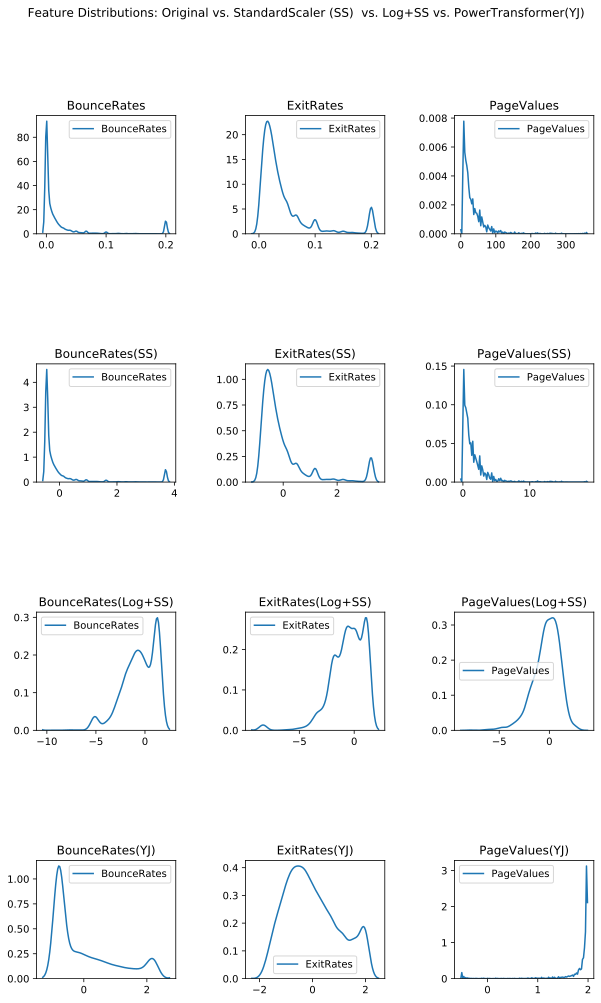

In [30]:
fig, ax = plt.subplots(figsize=(10,15),ncols=3,nrows=4)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  1.1    # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.0

plt.suptitle("Feature Distributions: Original vs. StandardScaler (SS)  vs. Log+SS vs. PowerTransformer(YJ)", y = 1.0, fontsize=12)

#Original Dataset
ax[0][0].set_title("BounceRates",                    y = y_title_margin)
ax[0][1].set_title("ExitRates",         y = y_title_margin)
ax[0][2].set_title("PageValues", y = y_title_margin)

sns.kdeplot(df['BounceRates'],   ax=ax[0][0])
sns.kdeplot(df['ExitRates'],   ax=ax[0][1])
sns.kdeplot(df['PageValues'],  ax=ax[0][2])

#StandardScaler (SS) 
ax[1][0].set_title("BounceRates(SS)",                    y = y_title_margin)
ax[1][1].set_title("ExitRates(SS)",         y = y_title_margin)
ax[1][2].set_title("PageValues(SS)", y = y_title_margin)

sns.kdeplot(X_train_stdscaled['BounceRates'],   ax=ax[1][0])
sns.kdeplot(X_train_stdscaled['ExitRates'],   ax=ax[1][1])
sns.kdeplot(X_train_stdscaled['PageValues'],  ax=ax[1][2])

#LogTransformed + SS
ax[2][0].set_title("BounceRates(Log+SS)",                    y = y_title_margin)
ax[2][1].set_title("ExitRates(Log+SS)",         y = y_title_margin)
ax[2][2].set_title("PageValues(Log+SS)", y = y_title_margin)

sns.kdeplot(X_train_logstdscaled['BounceRates'],   ax=ax[2][0])
sns.kdeplot(X_train_logstdscaled['ExitRates'],   ax=ax[2][1])
sns.kdeplot(X_train_logstdscaled['PageValues'],  ax=ax[2][2])

#PowerTransformation (Yeo-Johnson) - BoxCox requires strictly POSITIVE data (this set contains zeroes)
ax[3][0].set_title("BounceRates(YJ)",                    y = y_title_margin)
ax[3][1].set_title("ExitRates(YJ)",         y = y_title_margin)
ax[3][2].set_title("PageValues(YJ)", y = y_title_margin)

sns.kdeplot(X_train_YJscaled['BounceRates'],   ax=ax[3][0])
sns.kdeplot(X_train_YJscaled['ExitRates'],   ax=ax[3][1])
sns.kdeplot(X_train_YJscaled['PageValues'],  ax=ax[3][2]);

In [31]:
#my classifiers are quite imbalanced
y_train_distrib = y_train.value_counts()
y_test_distrib = y_test.value_counts()
print(y_train_distrib) 
print(y_test_distrib)

0    8324
1    1540
Name: Purchase, dtype: int64
0    2098
1     368
Name: Purchase, dtype: int64


In [32]:
#train-test split autoMAGICally splits my imbalanced data evenly across the train and tests sets--but we can confirm below with an average of y values in train vs. test
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

0.15612327656123276
0.1492295214922952


In [33]:
#now I want to sub-set my training data by performing a train-CV split
# kf = KFold(n_splits=5, shuffle=True, random_state = 41)
# for train_index, test_index in kf.split(X_train,y_train):
#     X_subtrain, X_CV = X_train[train_index], X_train[test_index]
#     y_subtrain, y_CV = y_train[train_index], y_train[test_index]
#X_subtrain, X_CV, y_subtrain, y_CV = KFold(X_train), y_train, test_size=0.2, random_state=41)
#^above code does not work... 

#need to figure out how to get the ACTUAL subtrain data values so I can run them each through the model and take the average
#HOWEVER, my dataset is large enough to have 1 static train and 1 static test

In [41]:
#following train-test split again to make my static X_subtrain and X_CV
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=41)

#pickle for future use
# X_subtrain_pickle = X_subtrain.to_pickle('X_subtrain')
# X_valid_pickle = X_valid.to_pickle('X_valid')
# y_subtrain_pickle = y_subtrain.to_pickle('y_subtrain')
# y_valid_pickle = y_valid.to_pickle('y_valid')

In [42]:
# sns.lmplot('column1', 'column2', data=df, hue='label',
#            palette='Set2', fit_reg=False, scatter_kws={'s': 20})
# plt.gcf().set_size_inches(12,8);
#^I wanted to show decision boundary plot, but haven't gotten working code yet

In [43]:
shopping_intent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 69 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
Weekend                          12330 non-null int64
Purchase                         12330 non-null int64
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_Jun                        12330 non-null uint8
Month_Mar    

In [ ]:
#features: page traffic and customer_type
def plot_features(df, sample_size=500):
    #'Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration', 'PageValues','VisitorType_New_Visitor','VisitorType_Returning_Visitor'
    sample = (df.drop(['BounceRates','ExitRates','OperatingSystems','Browser','Region','TrafficType','Weekend','SpecialDay','Month_Feb','Month_Mar','Month_May','Month_Jun','Month_Jul','Month_Sep','Month_Oct','Month_Nov','Month_Dec'],axis=1).sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='Purchase', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(X_train_logstdscaled.merge(y_train,left_index=True,right_index=True))

In [ ]:
#features: page traffic and customer_type
def plot_features(df, sample_size=500):
    #'Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration', 'PageValues','VisitorType_New_Visitor','VisitorType_Returning_Visitor'
    sample = (df.drop(['BounceRates','ExitRates','OperatingSystems','Browser','Region','TrafficType','Weekend','SpecialDay','Month_Feb','Month_Mar','Month_May','Month_Jun','Month_Jul','Month_Sep','Month_Oct','Month_Nov','Month_Dec'],axis=1).sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='Purchase', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(X_train_logstdscaled.merge(y_train,left_index=True,right_index=True))

In [ ]:
#features: page traffic and time
def plot_features(df, sample_size=500):
    #'Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','Weekend','SpecialDay','Month',
    sample = (df.drop(['BounceRates','ExitRates','PageValues','OperatingSystems','Browser','Region','TrafficType','VisitorType_New_Visitor','VisitorType_Returning_Visitor','Month_Feb','Month_Mar','Month_May','Month_Jun','Month_Jul','Month_Sep','Month_Oct','Month_Nov','Month_Dec'],axis=1).sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='Purchase', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(shopping_intent_df)

In [ ]:
#features: page traffic and site activity
def plot_features(df, sample_size=500):
    #'Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
    sample = (df.drop(['Weekend','SpecialDay','Month_Feb','Month_Mar','Month_May','Month_June','Month_Jul','Month_Sep','Month_Oct','Month_Nov','Month_Dec','OperatingSystems','Browser','Region','TrafficType','VisitorType_New_Visitor','VisitorType_Returning_Visitor'],axis=1).sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='Purchase', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(shopping_intent_df)



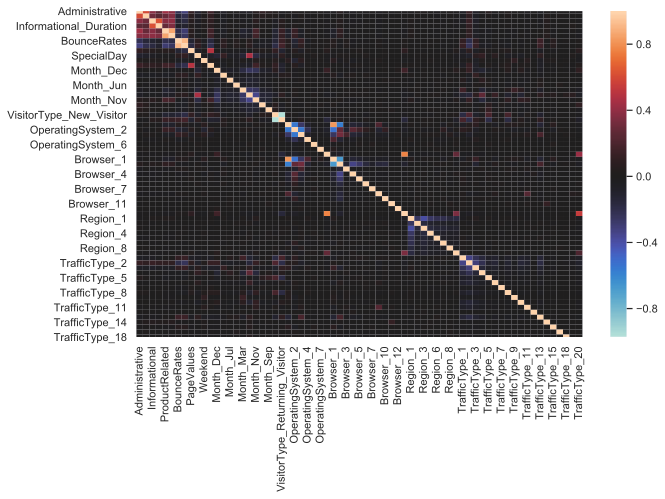

In [61]:
#to view multicolinearity of my features--which may not matter so much in tree-based models
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(shopping_intent_df.corr(), center=0);


In [62]:
shopping_intent_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 69 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
Weekend                          12330 non-null int64
Purchase                         12330 non-null int64
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_Jun                        12330 non-null uint8
Month_Mar    

In [73]:
shopping_intent_df['PageValues'].value_counts().sort_index(ascending=True)




0.000000      9600
0.038035         1
0.067050         1
0.093547         1
0.098621         1
              ... 
261.491286       1
270.784693       1
287.953793       1
360.953384       1
361.763742       1
Name: PageValues, Length: 2704, dtype: int64